In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
!pwd

/container_dir/GauravPks/OADS


In [39]:
df = pd.read_csv('unit2.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Employee ID                                       2793 non-null   object 
 1   Data Effective Date                               2793 non-null   object 
 2   Employee
Status
                                  2793 non-null   object 
 3   Career Level 
(1=lowest, 6=highest)
              2793 non-null   int64  
 4   Hired Date                                        2793 non-null   object 
 5   Hired in FY
(Yes/No)                              2793 non-null   object 
 6   Termination Date                                  613 non-null    object 
 7   Terminated
in FY
(Yes/No)                         2793 non-null   object 
 8   Termination Type
(Voluntary or Involuntary Exit)  613 non-null    object 
 9   Job Start Date     

In [40]:
df.columns = ['EmpId', 'DataEDate', 'EmpStatus', 'CarrerLevel', 'HiredDate', 'HiredInFY','TerminationDate', 'TerminationInFY','TerminationType','JobStDate','PromotedInFY','BirthDate','Age','TenureInY','TimeInJob','Rating','Education']

In [26]:
df.isnull().sum()

EmpId                 0
DataEDate             0
EmpStatus             0
CarrerLevel           0
HiredDate             0
HiredInFY             0
TerminationDate    2180
TerminationInFY       0
TerminationType    2180
JobStDate             0
PromotedInFY        345
BirthDate             0
Age                2793
TenureInY          2793
TimeInJob          2793
Rating                0
Education             0
dtype: int64

In [41]:
df.head()

,EmpId,DataEDate,EmpStatus,CarrerLevel,HiredDate,HiredInFY,TerminationDate,TerminationInFY,TerminationType,JobStDate,PromotedInFY,BirthDate,Age,TenureInY,TimeInJob,Rating,Education
0,N0001,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,01-09-1995,NaN,NaN,NaN,3,MA/MS
1,N0002,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,13-09-1994,NaN,NaN,NaN,4,MA/MS
2,N0003,31-12-2016,Active,1,26-05-2016,Yes,NaN,No,NaN,26-05-2016,NaN,19-04-1996,NaN,NaN,NaN,3,BA/BS
3,N0004,31-12-2016,Active,1,19-10-2016,Yes,NaN,No,NaN,19-10-2016,NaN,21-01-1994,NaN,NaN,NaN,3,BA/BS
4,N0005,31-12-2016,Active,1,06-02-2016,Yes,NaN,No,NaN,06-02-2016,NaN,18-05-1993,NaN,NaN,NaN,3,BA/BS


In [42]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['DataEDate'] = pd.to_datetime(df['DataEDate'])
df['JobStDate'] = pd.to_datetime(df['JobStDate'])
df['HiredDate'] = pd.to_datetime(df['HiredDate'])
df['TerminationDate'] = pd.to_datetime(df['TerminationDate'])

In [43]:
df['Age'] = (df['DataEDate'] - df['BirthDate'])
df['Age'] = round((df['Age'].astype('timedelta64[D]'))/365,1)

In [44]:
df['NewTerminationDate'] = df['TerminationDate'].fillna(df['DataEDate'])
df['NewTerminationDate'] = pd.to_datetime(df['NewTerminationDate'])

df['TenureInY'] = (df['NewTerminationDate'] - df['HiredDate'])
df['TenureInY'] = round((df['TenureInY'].astype('timedelta64[D]'))/365,1)

df['TimeInJob'] = (df['NewTerminationDate'] - df['JobStDate'])
df['TimeInJob'] = round((df['TimeInJob'].astype('timedelta64[D]'))/365,1)

df.drop('NewTerminationDate', axis='columns', inplace=True)

In [179]:
df.isnull().sum()

EmpId                  0
DataEDate              0
EmpStatus              0
CarrerLevel            0
HiredDate              0
HiredInFY              0
TerminationDate     5920
TerminationInFY        0
TerminationType     5920
JobStDate              0
PromotedInFY        1035
BirthDate              0
Age                    0
TenureInY              0
TimeInJob              0
Rating                 0
Education              0
TerminationYear     5920
TerminationMonth    5920
dtype: int64

In [45]:
df['TerminationYear'] = df['TerminationDate'].apply(lambda x : x.year)
df['TerminationMonth'] = df['TerminationDate'].apply(lambda x : x.month)

Employee Distribution- Carrer Level Wise

In [46]:
df_new = df[df.TerminationDate.isnull()]
CarrerLevel_cnt =np.round((df_new['CarrerLevel'].value_counts(normalize=True)* 100 ))
CarrerLevel_cnt

2    29.0
3    23.0
4    18.0
1    14.0
5    11.0
6     5.0
Name: CarrerLevel, dtype: float64

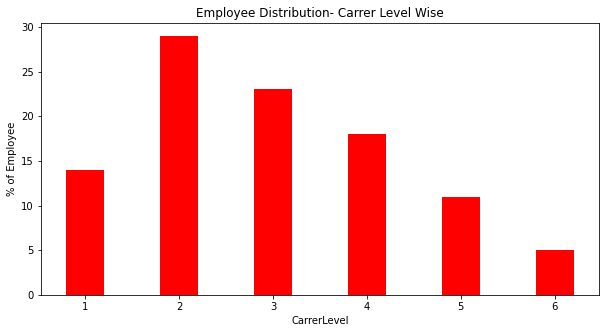

In [47]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(CarrerLevel_cnt.keys().values, CarrerLevel_cnt.to_numpy(), color ='red',  
        width = 0.4) 
plt.xlabel("CarrerLevel") 
plt.ylabel("% of Employee") 
plt.title("Employee Distribution- Carrer Level Wise") 
plt.show()

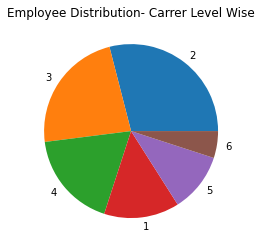

In [48]:
plt.pie(CarrerLevel_cnt.to_numpy(), labels = CarrerLevel_cnt.keys().values) 
plt.title("Employee Distribution- Carrer Level Wise")  
# show plot 
plt.show()

In [55]:
df_new = df[df.TerminationDate.isnull()]

f = lambda x : np.round(x/x.sum() * 100)
con_sector = df_new.groupby(['CarrerLevel', 'Rating'])['CarrerLevel'].count().unstack().apply(f, axis=1)
con_sector

Rating,3,4,5
CarrerLevel,,,
1,65.0,35.0,NaN
2,43.0,34.0,23.0
3,18.0,32.0,50.0
4,16.0,46.0,38.0
5,7.0,61.0,32.0
6,NaN,80.0,20.0


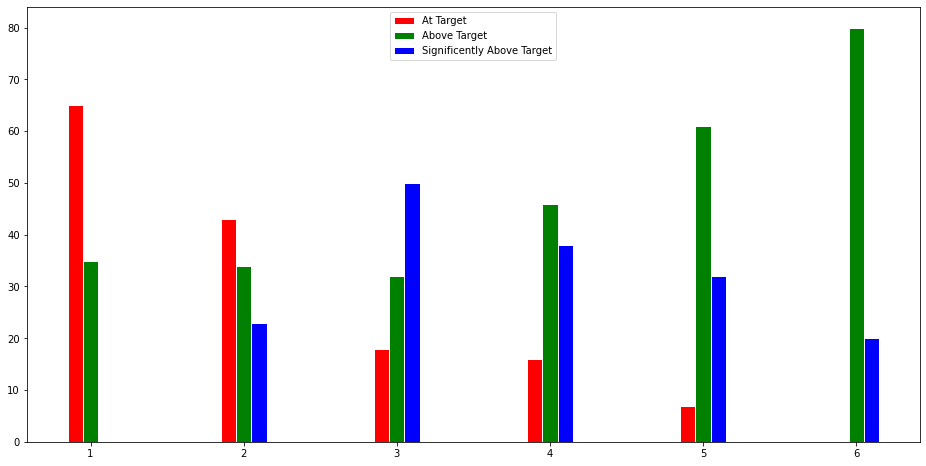

In [57]:
fig = plt.figure(figsize = (16, 8))
# set width of bar
barWidth = 0.1
# set height of bar
bars1 = con_sector.to_numpy()[:,0]
bars2 = con_sector.to_numpy()[:,1]
bars3 = con_sector.to_numpy()[:,2]




# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]



# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label="At Target")
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label="Above Target")
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label="Significently Above Target")


 
# Add xticks on the middle of the group bars
#plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ('1','2','3','4','5',6))
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [58]:
bool_series = pd.notnull(df["TerminationDate"])
df_new = df[bool_series]
TerminationLevel_cnt =np.round((df_new['CarrerLevel'].value_counts(normalize=True)* 100 ))
TerminationLevel_cnt

4    33.0
2    26.0
3    24.0
5     8.0
1     7.0
6     2.0
Name: CarrerLevel, dtype: float64

In [59]:
df_new.count()

EmpId               613
DataEDate           613
EmpStatus           613
CarrerLevel         613
HiredDate           613
HiredInFY           613
TerminationDate     613
TerminationInFY     613
TerminationType     613
JobStDate           613
PromotedInFY        568
BirthDate           613
Age                 613
TenureInY           613
TimeInJob           613
Rating              613
Education           613
TerminationYear     613
TerminationMonth    613
dtype: int64

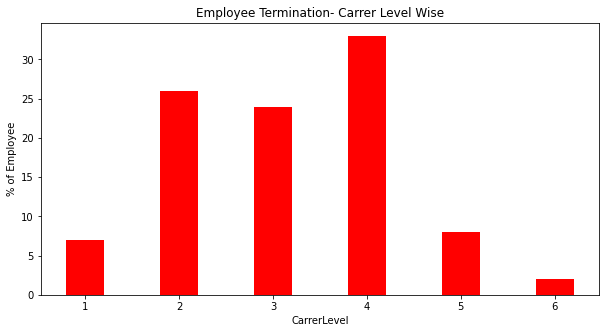

In [63]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(TerminationLevel_cnt.keys().values, TerminationLevel_cnt.to_numpy(), color ='red',  
        width = 0.4) 
plt.xlabel("CarrerLevel") 
plt.ylabel("% of Employee") 
plt.title("Employee Termination- Carrer Level Wise") 
plt.show()

In [60]:
bool_series = pd.notnull(df["TerminationDate"])
df_new = df[bool_series]
f = lambda x : np.round(x/x.sum() * 100)
con_sector = df_new.groupby(['CarrerLevel', 'Rating'])['CarrerLevel'].count().unstack().apply(f, axis=1)
con_sector

Rating,1,2,3
CarrerLevel,,,
1,9.0,91.0,NaN
2,7.0,89.0,4.0
3,3.0,91.0,5.0
4,NaN,67.0,33.0
5,NaN,70.0,30.0
6,NaN,50.0,50.0


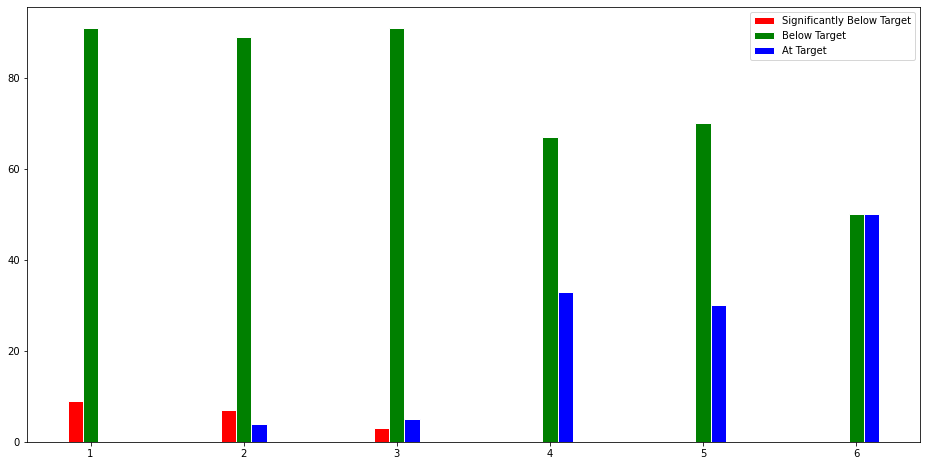

In [62]:
fig = plt.figure(figsize = (16, 8))
# set width of bar
barWidth = 0.1
# set height of bar
bars1 = con_sector.to_numpy()[:,0]
bars2 = con_sector.to_numpy()[:,1]
bars3 = con_sector.to_numpy()[:,2]



# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]




# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Significantly Below Target')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='Below Target')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='At Target')


 
# Add xticks on the middle of the group bars
#plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ('1','2','3','4','5',6))
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [65]:
TerminationType_cnt =np.round((df_new['TerminationType'].value_counts(normalize=True)* 100 ))
TerminationType_cnt

Involuntary Exit    63.0
Voluntary Exit      37.0
Name: TerminationType, dtype: float64

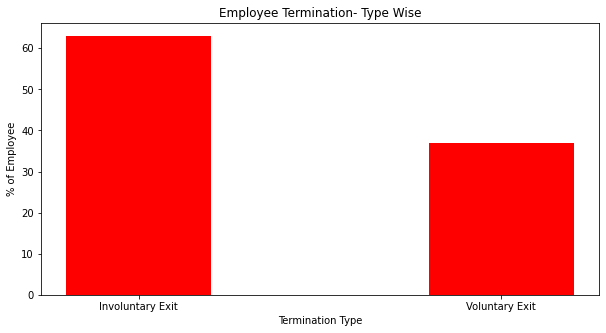

In [66]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(TerminationType_cnt.keys().values, TerminationType_cnt.to_numpy(), color ='red',  
        width = 0.4) 
plt.xlabel("Termination Type") 
plt.ylabel("% of Employee") 
plt.title("Employee Termination- Type Wise") 
plt.show()

In [79]:
TerminationInFY_cnt =np.round((df['TerminationInFY'].value_counts(normalize=True)* 100 ))
TerminationInFY_cnt

No     78.0
Yes    22.0
Name: TerminationInFY, dtype: float64

In [82]:
f = lambda x : np.round(x/x.sum() * 100)
con_term = df.groupby(['CarrerLevel', 'TerminationInFY'])['TerminationInFY'].count().unstack().apply(f, axis=1)
con_term

TerminationInFY,No,Yes
CarrerLevel,,
1,87.0,13.0
2,80.0,20.0
3,77.0,23.0
4,67.0,33.0
5,83.0,17.0
6,91.0,9.0


In [75]:
PromotedInFY_cnt =np.round((df['PromotedInFY'].value_counts(normalize=True)* 100 ))
PromotedInFY_cnt

No     73.0
Yes    27.0
Name: PromotedInFY, dtype: float64

In [81]:
f = lambda x : np.round(x/x.sum() * 100)
con_prom = df.groupby(['CarrerLevel', 'PromotedInFY'])['PromotedInFY'].count().unstack().apply(f, axis=1)
con_prom

PromotedInFY,No,Yes
CarrerLevel,,
2,79.0,21.0
3,61.0,39.0
4,75.0,25.0
5,73.0,27.0
6,82.0,18.0


In [83]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = df.groupby(['PromotedInFY', 'TerminationInFY'])['TerminationInFY'].count().unstack().apply(f, axis=1)
con_p_term

TerminationInFY,No,Yes
PromotedInFY,,
No,68.0,32.0
Yes,100.0,NaN


In [86]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = df.groupby(['PromotedInFY', 'TerminationType'])['PromotedInFY'].count().unstack().apply(f, axis=1)
con_p_term

TerminationType,Involuntary Exit,Voluntary Exit
PromotedInFY,,
No,61.0,39.0


In [87]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = df.groupby(['PromotedInFY', 'Rating'])['PromotedInFY'].count().unstack().apply(f, axis=1)
con_p_term

Rating,1,2,3,4,5
PromotedInFY,,,,,
No,1.0,25.0,31.0,43.0,NaN
Yes,NaN,NaN,NaN,3.0,97.0


In [88]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = df.groupby(['TerminationInFY', 'Rating'])['TerminationInFY'].count().unstack().apply(f, axis=1)
con_p_term

Rating,1,2,3,4,5
TerminationInFY,,,,,
No,NaN,NaN,29.0,41.0,30.0
Yes,3.0,80.0,16.0,NaN,NaN


In [91]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = df.groupby(['TerminationInFY', 'Rating', 'TerminationType',])['Rating'].count().unstack().apply(f, axis=1)
con_p_term

TerminationType         Involuntary Exit  Voluntary Exit
TerminationInFY Rating                                  
Yes             1                  100.0             NaN
                2                   74.0            26.0
                3                    NaN           100.0

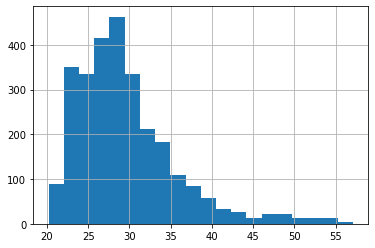

In [92]:
df['Age'].hist(bins =20);

In [93]:
df['Age'].max()

57.1

In [99]:
df['AgeGroups']=pd.cut(df.Age,np.arange(20, 70, 5))

In [100]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = df.groupby(['AgeGroups', 'Rating'])['Rating'].count().unstack().apply(f, axis=1)
con_p_term

Rating,1,2,3,4,5
AgeGroups,,,,,
"(20, 25]",1.0,12.0,47.0,30.0,9.0
"(25, 30]",1.0,20.0,24.0,26.0,27.0
"(30, 35]",0.0,21.0,18.0,28.0,32.0
"(35, 40]",0.0,17.0,14.0,49.0,20.0
"(40, 45]",0.0,14.0,11.0,55.0,21.0
"(45, 50]",0.0,0.0,0.0,73.0,27.0
"(50, 55]",0.0,11.0,9.0,74.0,6.0
"(55, 60]",0.0,33.0,33.0,33.0,0.0
"(60, 65]",NaN,NaN,NaN,NaN,NaN


In [104]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = df.groupby(['AgeGroups',  'TerminationType'])['TerminationInFY'].count().unstack().apply(f, axis=1)
con_p_term

TerminationType,Involuntary Exit,Voluntary Exit
AgeGroups,,
"(20, 25]",84.0,16.0
"(25, 30]",71.0,29.0
"(30, 35]",46.0,54.0
"(35, 40]",47.0,53.0
"(40, 45]",67.0,33.0
"(45, 50]",NaN,NaN
"(50, 55]",57.0,43.0
"(55, 60]",50.0,50.0
"(60, 65]",NaN,NaN


In [109]:
df['TenureGroups']=pd.cut(df.TenureInY,np.arange(0, 35, 5))

In [111]:
f = lambda x : np.round(x/x.sum() * 100)
con_p_term = df.groupby(['TenureGroups',  'TerminationType'])['TerminationInFY'].count().unstack().apply(f, axis=1)
con_p_term

TerminationType,Involuntary Exit,Voluntary Exit
TenureGroups,,
"(0, 5]",51.0,49.0
"(5, 10]",90.0,10.0
"(10, 15]",77.0,23.0
"(15, 20]",68.0,32.0
"(20, 25]",NaN,NaN
"(25, 30]",75.0,25.0
